In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	21
float64		column 2	21
float64		column 3	35
float64		column 4	8
float64		column 5	14
float64		column 6	14
float64		column 7	15
float64		column 8	36
float64		column 9	35
float64		column 10	43
float64		column 11	43
float64		column 12	35
float64		column 13	22


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,249.000000,249.000000,235.000000,262.00000,256.000000,256.000000,255.000000,234.000000,235.000000,227.000000,227.000000,235.000000,248.000000
mean,0.674699,54.502008,3.136170,131.69084,249.789062,0.148438,1.043137,149.649573,0.327660,1.017181,1.594714,0.680851,4.661290
std,0.469431,9.055441,0.973237,17.85531,52.276888,0.356230,0.997093,23.258139,0.470362,1.165855,0.619426,0.954217,1.937848
min,0.000000,29.000000,1.000000,94.00000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,2.500000,120.00000,212.750000,0.000000,0.000000,132.250000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.00000,245.000000,0.000000,2.000000,153.000000,0.000000,0.600000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.00000,278.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.00000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

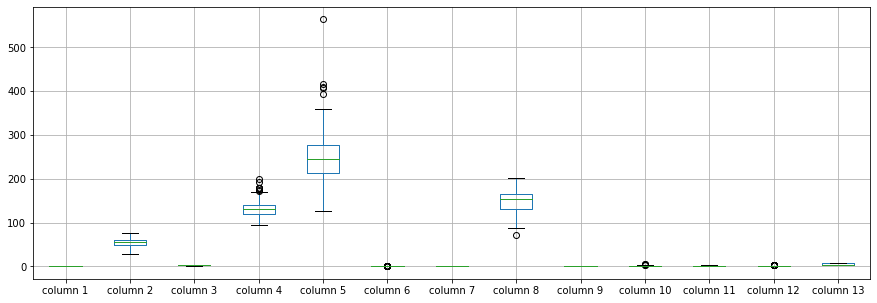

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.674699
column 2      54.502008
column 3       3.136170
column 4     131.690840
column 5     249.789062
column 6       0.148438
column 7       1.043137
column 8     149.649573
column 9       0.327660
column 10      1.017181
column 11      1.594714
column 12      0.680851
column 13      4.661290
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.085241,0.053757,-0.077097,-0.206770,0.064682,0.059753,-0.049410,0.186130,0.071046,0.044772,0.078510,0.363118
column 2,-0.085241,1.000000,0.102666,0.316541,0.228003,0.118746,0.125450,-0.393251,0.114575,0.228782,0.175888,0.365090,0.089873
column 3,0.053757,0.102666,1.000000,-0.039403,0.056132,-0.094973,0.059246,-0.284256,0.399248,0.169572,0.141317,0.233134,0.307942
column 4,-0.077097,0.316541,-0.039403,1.000000,0.181953,0.136893,0.094950,-0.001630,0.036047,0.256353,0.180478,0.103137,0.125757
column 5,-0.206770,0.228003,0.056132,0.181953,1.000000,0.005472,0.165145,0.025936,0.055602,0.006371,-0.005043,0.120093,0.034260
column 6,0.064682,0.118746,-0.094973,0.136893,0.005472,1.000000,0.044029,0.037829,-0.008707,-0.014607,0.095467,0.127662,0.056658
column 7,0.059753,0.125450,0.059246,0.094950,0.165145,0.044029,1.000000,-0.086392,0.104502,0.120820,0.189408,0.081402,-0.009610
column 8,-0.049410,-0.393251,-0.284256,-0.001630,0.025936,0.037829,-0.086392,1.000000,-0.334948,-0.340692,-0.365818,-0.227717,-0.253377
column 9,0.186130,0.114575,0.399248,0.036047,0.055602,-0.008707,0.104502,-0.334948,1.000000,0.215443,0.211276,0.185362,0.315146
column 10,0.071046,0.228782,0.169572,0.256353,0.006371,-0.014607,0.120820,-0.340692,0.215443,1.000000,0.612705,0.272828,0.324882


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+104,13+104+104,13+104+104+104,13+104+104+104+104,13+104+104+104+104+104,13+104+104+104+104,13+104+104+104,13+104+104,13+104,13], vae_layer = False, seed = 104)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 567.3444347381592
Epoch: 1 , loss: 569.112964630127
Epoch: 2 , loss: 565.1244201660156
Epoch: 3 , loss: 565.0541648864746
Epoch: 4 , loss: 566.1522254943848
Epoch: 5 , loss: 565.9487915039062
Epoch: 6 , loss: 567.78515625
Epoch: 7 , loss: 563.3850364685059
Epoch: 8 , loss: 566.5184478759766
Epoch: 9 , loss: 562.1080989837646
Epoch: 10 , loss: 559.1621475219727
Epoch: 11 , loss: 555.4249477386475
Epoch: 12 , loss: 553.9576454162598
Epoch: 13 , loss: 548.190673828125
Epoch: 14 , loss: 543.9180374145508
Epoch: 15 , loss: 526.7882022857666
Epoch: 16 , loss: 509.80941581726074
Epoch: 17 , loss: 481.1290340423584
Epoch: 18 , loss: 481.3848361968994
Epoch: 19 , loss: 457.2478885650635
Epoch: 20 , loss: 436.07048988342285
Epoch: 21 , loss: 424.59398460388184
Epoch: 22 , loss: 405.145601272583
Epoch: 23 , loss: 389.9331912994385
Epoch: 24 , loss: 370.8992176055908
Epoch: 25 , loss: 372.1794185638428
Epoch: 26 ,

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
266,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
267,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
268,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(670.8400257097187, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.12389117305950116

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.0,4.000000,130.0,322.0,0.00000,2.0,109.000000,0.0,2.4,2.000000,3.000000,3.0
1,0.000000,67.0,3.000000,115.0,564.0,0.00000,2.0,160.000000,0.0,1.6,2.000000,0.000000,7.0
2,1.000000,57.0,2.000000,124.0,261.0,0.00000,0.0,141.000000,0.0,0.3,1.000000,0.000000,7.0
3,1.000000,64.0,4.000000,128.0,263.0,0.00000,0.0,105.000000,1.0,0.2,2.000000,1.000000,7.0
4,0.000000,74.0,2.000000,120.0,269.0,0.00000,2.0,121.000000,1.0,0.2,1.000000,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.0,3.000000,172.0,199.0,1.00000,0.0,162.000000,0.0,0.5,1.000000,0.000000,7.0
266,1.000000,44.0,2.000000,120.0,263.0,0.00000,0.0,173.000000,0.0,0.0,1.000000,0.000000,7.0
267,0.000000,56.0,2.000000,140.0,294.0,0.00000,2.0,153.000000,0.0,1.3,2.000000,0.000000,3.0
268,1.000000,57.0,4.000000,140.0,192.0,0.00000,0.0,148.000000,0.0,0.4,2.000000,0.000000,6.0


In [20]:
imputations[-1].to_excel("Sheart_AN_10(imp).xlsx", index=False, header=False)